<a href="https://colab.research.google.com/github/sam445uutg/-car-predicition-system-imge-/blob/main/car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow
!pip install tensorflow.keras

ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


In [ ]:
!pip install keras.applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
#resize image
IAMGE_SIZE = [224, 224]


train_path ="/content/drive/MYDrive/Datasets/Datasets/Train"
test_path= "/content/drive/MyDrive/Datasets/Datasets/Test"

In [ ]:
#import the vgg 16 libaray as  showsn below and add
#2444*244*RGB
resnet = ResNet50(include_top=False, input_shape=IAMGE_SIZE+[3] , weights='imagenet')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
vgg16 = VGG16(include_top=False, weights="imagenet",input_shape=IAMGE_SIZE+[3])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layers in resnet.layers:
  layers.trainable = False

In [ ]:
for layers in vgg16.layers:
  layers.trainable = False

In [ ]:
  folders=glob('/content/drive/MyDrive/Datasets/Datasets/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Datasets/Datasets/Train/mercedes',
 '/content/drive/MyDrive/Datasets/Datasets/Train/audi',
 '/content/drive/MyDrive/Datasets/Datasets/Train/lamborghini']

In [ ]:
x= Flatten()(resnet.output)


In [ ]:
from keras.layers.core.dense import Dense
predict= Dense(len(folders),activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=predict)

In [ ]:
# predict = Dense(len(folders), activation='softmax')(x)
# model1 = Model(inputs=vgg16.input, outputs=predict)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
train_datasets= ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagan =ImageDataGenerator(rescale =1./255)

In [ ]:
train_data=train_datasets.flow_from_directory("/content/drive/MyDrive/Datasets/Datasets/Train",
                                              target_size=(224,224),
                                              batch_size=32,
                                             class_mode='categorical')
test_data=test_datagan.flow_from_directory("/content/drive/MyDrive/Datasets/Datasets/Test",
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


***https://keras.io/***

In [ ]:
r= model.fit_generator(
    train_data,
    validation_data=test_data,
    epochs=50,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

<ipython-input-26-6b0b315f12f3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r= model.fit_generator(


Epoch 1/50
2/2 [==============================] - 44s 35s/step - loss: 5.0168 - accuracy: 0.4219 - val_loss: 12.1077 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 18s 14s/step - loss: 15.0386 - accuracy: 0.2969 - val_loss: 4.7259 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 19s 14s/step - loss: 3.7293 - accuracy: 0.5000 - val_loss: 7.8341 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 19s 14s/step - loss: 5.9842 - accuracy: 0.5312 - val_loss: 12.6141 - val_accuracy: 0.2759
Epoch 5/50
2/2 [==============================] - 19s 14s/step - loss: 7.7562 - accuracy: 0.3906 - val_loss: 12.0070 - val_accuracy: 0.3966
Epoch 6/50
2/2 [==============================] - 19s 14s/step - loss: 6.4809 - accuracy: 0.5156 - val_loss: 7.4282 - val_accuracy: 0.3793
Epoch 7/50
2/2 [==============================] - 19s 14s/step - loss: 3.1568 - accuracy: 0.5781 - val_loss: 1.0516 - val_accuracy: 0.5000
Epoch 8/50
2/2 [=======

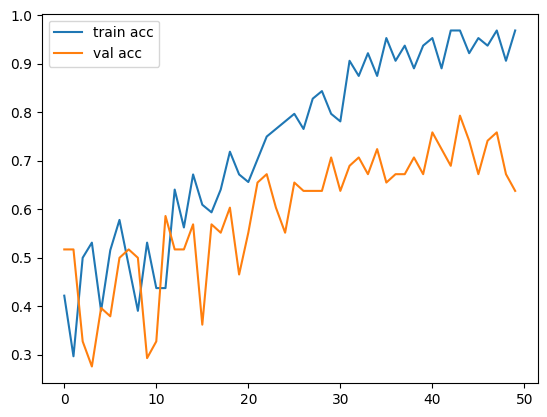

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()